# **Leaders in Training Program (LTP) - Data Science Stream (P3) Written Assignment**

Competition #43680

LAC, LE AN (Leann)

February 18, 2025


This notebook (code and text) is used to answer the questions as per requirements of Competition #43680 Leaders in Training Program (LTP) - Data Science Stream (P3). The analysis task is completed using Python programming language along with statistical package(s). This Jupyter notebook is prepared on Google Colab with datasets are saved in Google Drive.


## **1. Connecting Google Drive and import libraries**


In [1]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/LTP"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/LTP


In [2]:
# list the folders and files in the connected folder
!ls

data  figures  results


In [3]:
# install packages
!pip install sidetable

In [4]:
# import external Python libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sidetable
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

## **2. Importing data files**

In [5]:
# import the building and safety inspections dataset
inspections_data = pd.read_csv('data/Building_and_Safety_Inspections_20250218.csv')
print(inspections_data.head())

                     ADDRESS             PERMIT   Permit Status  \
0  10000 W SANTA MONICA BLVD  14044 10000 02293          Issued   
1        1000 S SANTA FE AVE  15016 10000 18196  Permit Finaled   
2       3680 N BUENA PARK DR  15014 10000 04931          Issued   
3     1001 N LINDENWOOD LANE  16042 90000 14712  Permit Finaled   
4          2836 S ANCHOR AVE  15016 20001 17211     CofO Issued   

  Inspection Date    Inspection Type Inspection Result      Latitude/Longitude  
0      07/20/2016  Rough-Ventilation  Partial Approval  (34.06364, -118.41437)  
1      07/22/2016    Smoke Detectors    Insp Cancelled  (34.03143, -118.22981)  
2      07/18/2016         Insulation          Approved  (34.13745, -118.38853)  
3      07/20/2016              Final    Permit Finaled  (34.07732, -118.48578)  
4      07/18/2016         Inspection    Permit Finaled  (34.03878, -118.39963)  


In [6]:
print(inspections_data.shape)

(10237490, 7)


Dimension of this dataset is 10,237,490 x 7.

In [7]:
# import the building and safety permit dataset
permit_data = pd.read_csv('data/Building_and_Safety_Permit_Information_Old_20250218.csv')
print(permit_data.head())

  Assessor Book Assessor Page Assessor Parcel     Tract Block  Lot  \
0        5028.0          15.0             018  TR 17452   NaN  117   
1        5527.0           7.0             024   TR 4849   NaN  205   
2        2115.0          19.0             013  TR 23770   NaN    7   
3        2375.0          21.0             027   P M 353   NaN    A   
4        5437.0          30.0             021   TR 5892   NaN  112   

  Reference # (Old Permit #)      PCIS Permit #          Status Status Date  \
0                        NaN  21041-90000-71074          Issued  10/06/2021   
1                        NaN  18041-10001-38413  Permit Finaled  10/05/2021   
2                        NaN  21041-90000-71819          Issued  10/08/2021   
3                        NaN  21044-90000-01437  Permit Finaled  10/05/2021   
4                        NaN  21041-90000-23275  Permit Finaled  10/04/2021   

   ... Applicant Address 3          Zone Occupancy  \
0  ...        RICHMOND, CA          R1-1       NaN

In [8]:
print(permit_data.shape)

(1635148, 59)


Dimension of this dataset is 1,635,148 x 59.

## **3. Data preparation**


To answer question 1, we may need to link the inspection_data with permit_data to have more information about permits. The key to link these two datasets are the permit number which is named as PERMIT and PCIS Permit # in inspection_data and permit_data, respectively. However, they were also stored in different formats. Thus, we first need to standardize the format before linking.

In [9]:
# standardize the format
permit_data['PERMIT'] = permit_data['PCIS Permit #'].str.replace('-', ' ')

In [10]:
print(permit_data['PERMIT'])

0          21041 90000 71074
1          18041 10001 38413
2          21041 90000 71819
3          21044 90000 01437
4          21041 90000 23275
                 ...        
1635143    21041 90000 63373
1635144    22041 10000 38568
1635145    22016 10000 00059
1635146    22014 20002 01904
1635147    18016 10000 13406
Name: PERMIT, Length: 1635148, dtype: object


Check if there are any applications linked between these two datasets.

In [11]:
inspections_data['Check'] = inspections_data['PERMIT'].isin(permit_data['PERMIT'])

In [12]:
inspections_data['Check'].sum()

7926840

Due to the limitation in computing resource, instead of merging all information, a subset of information about permit informaiton will be extract in a new_permit_data.

In [13]:
subset_permit_data = permit_data.loc[:,['PERMIT','Permit Type','Permit Sub-Type','Permit Category','Zip Code',
                                        'Contractor City','Contractor State',]]

In [14]:
subset_permit_data_CA = subset_permit_data[subset_permit_data['Contractor State']=='CA']

In [15]:
# merge data
permit_inspection_data = pd.merge(inspections_data, subset_permit_data_CA, on='PERMIT', how='inner')

In [16]:
# check dimension of merged data
print(permit_inspection_data.shape)

(5688168, 14)


In [17]:
# drop the check column
permit_inspection_data.drop(columns=['Check'], inplace=True)

In [18]:
permit_inspection_data.head()

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude,Permit Type,Permit Sub-Type,Permit Category,Zip Code,Contractor City,Contractor State
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)",HVAC,Apartment,Plan Check,90067.0,IRVINE,CA
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)",Bldg-Alter/Repair,Commercial,Plan Check,90021.0,LOS ANGELES,CA
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)",Bldg-Addition,1 or 2 Family Dwelling,Plan Check,91604.0,SUNLAND,CA
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)",Plumbing,1 or 2 Family Dwelling,No Plan Check,90049.0,LOS ANGELES,CA
4,5489 E KEATS ST,16042 10000 12648,Permit Finaled,07/18/2016,Final,Permit Finaled,"(34.09126, -118.16077)",Plumbing,1 or 2 Family Dwelling,No Plan Check,90032.0,TEMPLE CITY,CA


## **4. Question 1**
Make a table **and** a visualization showing an interesting characteristic of the permit and inspection dataset.


In [19]:
# count NaN values under an entire DataFrame:
permit_inspection_data.isna().any()

,0
ADDRESS,True
PERMIT,False
Permit Status,True
Inspection Date,True
Inspection Type,True
Inspection Result,True
Latitude/Longitude,True
Permit Type,False
Permit Sub-Type,False
Permit Category,False


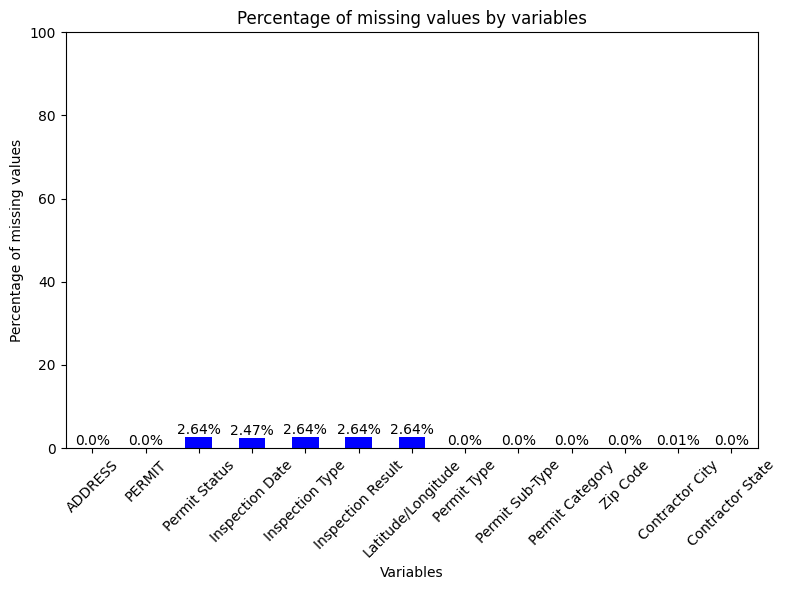

In [20]:
# calculate percentage of missing values for each column
missing_percentage = (permit_inspection_data.isnull().mean() * 100).round(2)

# create a bar plot
plt.figure(figsize=(8, 6))
missing_percentage.plot(kind='bar', color='blue')

# add labels and title
plt.xlabel('Variables')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation = 45)
plt.ylim(0,100)
plt.title('Percentage of missing values by variables')

# add percentage values on top of each bar
for i, val in enumerate(missing_percentage):
  plt.text(i, val, f'{val}%', ha='center', va='bottom')

# save the plot as a file
plt.savefig('figures/missing_percentage.png')

# show the plot
plt.tight_layout()
plt.show()

If we look at the missing percentage chart, contractor state has highest missing percentage, corresponding to 25.07%. Since th dataset is quite large, due to the nature of this assignment, we will not further discuss about imputation. Instead, also due to limitation of computing resources, we will show how to use Python to deleting missingness.

In [21]:
permit_inspection_data_cleaned = permit_inspection_data.dropna()
print(permit_inspection_data_cleaned.shape)

(5537452, 13)


After merging two datasets, deleting all rows with missing values, the size of the dataset 5,790,975 applications x 13 variables/features.

In [22]:
# recheck missingness
permit_inspection_data_cleaned.isna().any()

,0
ADDRESS,False
PERMIT,False
Permit Status,False
Inspection Date,False
Inspection Type,False
Inspection Result,False
Latitude/Longitude,False
Permit Type,False
Permit Sub-Type,False
Permit Category,False


No missing values found in the cleaned data.

### 4.1 Tables

**Permit Status**

In [23]:
table_permit_status = permit_inspection_data_cleaned.stb.freq(['Permit Status'])[['Permit Status','count','percent']]
table_permit_status

,Permit Status,count,percent
0,Issued,4243536,76.633369
1,Permit Finaled,939575,16.967641
2,CofO Issued,170881,3.085914
3,CofO in Progress,104354,1.884513
4,Permit Expired,36121,0.652304
5,Permit Closed,22822,0.412139
6,OK for CofC,11008,0.198792
7,CofC Issued,4977,0.089879
8,CofO Corrected,2215,0.040000
9,Re-Activate Permit,1025,0.018510


There are different status of the permit where issued permits take about 76.63%.

**Permit Type**

In [24]:
table_permit_type = permit_inspection_data_cleaned.stb.freq(['Permit Type'])[['Permit Type','count','percent']]
table_permit_type

,Permit Type,count,percent
0,Bldg-Alter/Repair,1322759,23.887503
1,Electrical,1064094,19.216311
2,Bldg-New,813428,14.689572
3,Plumbing,597328,10.787055
4,Bldg-Addition,595023,10.745429
5,HVAC,374051,6.754930
6,Swimming-Pool/Spa,223308,4.032685
7,Fire Sprinkler,213442,3.854516
8,Grading,154567,2.791302
9,Nonbldg-New,101846,1.839221


**Inspection type**

In [25]:
table_inspection_type = permit_inspection_data_cleaned.stb.freq(['Inspection Type'])[['Inspection Type','count','percent']]
table_inspection_type

,Inspection Type,count,percent
0,Final,1468597,26.521169
1,Rough,501347,9.053749
2,Smoke Detectors,196233,3.543742
3,Service/Power Release,171921,3.104695
4,Inspection,147424,2.662308
...,...,...,...
166,Notice of Violation,10,0.000181
167,Permit Expiration,9,0.000163
168,Non Compliance,9,0.000163
169,Preliminary,7,0.000126


### 4.1 Visualization

Here we will just visualize the number of applications corresponding to different permit types.

In [26]:
import plotly.express as px

In [27]:
fig = px.bar(table_permit_type, x='Permit Type', y='count', text_auto='.0f',width=800, height=500, template = 'plotly_white')
fig.update_layout(
  margin=dict(l=20, r=20, t=40, b=20),
  xaxis=dict(
    title_text="Permit Type",
    tickmode='linear',
    titlefont=dict(size=15),
  ),
title="Number of applications by permit types."
)

As we see that the most applications were submitted to request permits for building repair among all permit types. There are only 54 permits issued for building relocation, and 62 permits for nonbuilding demolition. Now, lets make a comparision between permits for building repairs and not for building repairs.

In [28]:
# create a boolean column based on permit type
table_permit_type["Building Repair"] = table_permit_type["Permit Type"] == "Bldg-Alter/Repair"

# grouping and counting
result = table_permit_type.groupby("Building Repair")[["count", "percent"]].sum()
print(result)

                   count    percent
Building Repair                    
False            4214693  76.112497
True             1322759  23.887503


After grouping the information, we see building repair only accounts for 23.93% of all permits. Remaining 76.07% of permits are distributed to another 16 permit types.

## **5. Question 2**

**Make a table and a visualization showing the number of inspections by geography. In a sentence or two describe any patterns you observe.**




In [29]:
permit_inspection_data_cleaned.head()

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude,Permit Type,Permit Sub-Type,Permit Category,Zip Code,Contractor City,Contractor State
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)",HVAC,Apartment,Plan Check,90067.0,IRVINE,CA
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)",Bldg-Alter/Repair,Commercial,Plan Check,90021.0,LOS ANGELES,CA
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)",Bldg-Addition,1 or 2 Family Dwelling,Plan Check,91604.0,SUNLAND,CA
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)",Plumbing,1 or 2 Family Dwelling,No Plan Check,90049.0,LOS ANGELES,CA
4,5489 E KEATS ST,16042 10000 12648,Permit Finaled,07/18/2016,Final,Permit Finaled,"(34.09126, -118.16077)",Plumbing,1 or 2 Family Dwelling,No Plan Check,90032.0,TEMPLE CITY,CA


In [30]:
table_contractor_city = permit_inspection_data_cleaned.stb.freq(['Contractor City'])[['Contractor City', 'count']]
table_contractor_city

,Contractor City,count
0,LOS ANGELES,886282
1,VAN NUYS,210874
2,GLENDALE,157024
3,WOODLAND HILLS,131761
4,TARZANA,118200
...,...,...
1020,"ANAHEIM HILLS,",1
1021,ACTO,1
1022,8037 CAMPION DRIVE,1
1023,'WEST HILLS,1


As we see that, there are many spcecial characters in contractor city, it makes the result is not accurate. We will try to remove all these special characters.

In [31]:
permit_inspection_data_cleaned['Contractor City'] = permit_inspection_data_cleaned['Contractor City'].str.replace(r'[^a-zA-Z]', '', regex=True)

In [32]:
table_contractor_city = permit_inspection_data_cleaned.stb.freq(['Contractor City'])[['Contractor City', 'count', 'percent']]
table_contractor_city

,Contractor City,count,percent
0,LOSANGELES,886809,16.014748
1,VANNUYS,211157,3.813252
2,GLENDALE,157102,2.837081
3,WOODLANDHILLS,131883,2.381655
4,TARZANA,118232,2.135134
...,...,...,...
864,CA,1,0.000018
865,BISHOP,1,0.000018
866,BELMONT,1,0.000018
867,APPLEVALLEYCA,1,0.000018


In [33]:
# using pie chart
fig2 = px.pie(table_contractor_city, values='count', names='Contractor City',
              title="Number of inspections by geography")
# remove all labels inside the pie chart
fig2.update_traces(textinfo='none')

Since we use the data for California and there are 869 cities/areas, its hard to visualize using pie chart. But, we can see that the significant number of inspections is from Los Angeles, which accounts for about 16% of applications.

In [34]:
permit_inspection_data_cleaned["Contractor City"] = permit_inspection_data_cleaned["Contractor City"].astype(str)

# create 'Area' column to classify as 'LA' or 'Non-LA'
permit_inspection_data_cleaned["Area"] = np.where(permit_inspection_data_cleaned["Contractor City"].str.upper() == "LOSANGELES", "LA", "Non-LA")

# group by 'Area' and count
tab1 = permit_inspection_data_cleaned.stb.freq(['Area'])[['Area', 'count', 'percent']]
tab1

,Area,count,percent
0,Non-LA,4650643,83.985252
1,LA,886809,16.014748


**Make a table and a visualization showing the results of inspections across geographies. In a sentence or two describe any patterns you observe.**



In [35]:
tab3 = permit_inspection_data_cleaned.stb.freq(['Area', 'Inspection Result'])[['Area', 'Inspection Result', 'count', 'percent']]
tab3

,Area,Inspection Result,count,percent
0,Non-LA,Approved,894545,16.154452
1,Non-LA,Insp Scheduled,681410,12.305479
2,Non-LA,Permit Finaled,606761,10.957404
3,Non-LA,Partial Approval,550421,9.939969
4,Non-LA,Not Ready for Inspection,411286,7.427351
...,...,...,...,...
100,Non-LA,OK to Issue TCO,1,0.000018
101,Non-LA,CofO Revoked,1,0.000018
102,Non-LA,CofO Reactivated,1,0.000018
103,Non-LA,CofO Corrected-Status Void,1,0.000018


In [36]:
tab3['percent'] = tab3['percent'].astype(float)

fig3 = px.bar(
    tab3,
    x="Area",
    y="percent",
    color="Inspection Result",
    barmode="group",
    labels={
        "percent": "Proportion of Inspections (%)",
        "Area": "Geographical Areas"
    },
    height=600,
    text=tab3["percent"].apply(lambda x: f'{x:.2f}%'),
    title="Proportion of different inspections results in LA versus non-LA urban areas."
)

fig3.show()

From this graph, we can see that the total inspection applications receive results are more in non-LA area in compared to in LA. Among all inspection results, approved inspections account for the highest percentage in both LA and non-LA areas.  

**Were there any permits that did not get an inspection?**

In [37]:
not_inspected_list = list(set(permit_data['PCIS Permit #'].to_list()) - set(inspections_data['PERMIT'].to_list()))
print("Number of permits that did not get inspection: ",len(not_inspected_list))

Number of permits that did not get inspection:  1447913


## **6. Question 3**

**Your manager is convinced 'out of town' contractors are not as invested in the success of their projects and so are the main culprits when it comes to violations. You are asked to complete an analysis to test this hypothesis.**

**Produce a model that quantifies the relationship between a contractor's place of origin and their inspection outcome history. Investigate any other relevant factors as necessary.**

**Interpret your results and produce a clear response for your manager.**

In [38]:
permit_inspection_data_cleaned.head()

,ADDRESS,PERMIT,Permit Status,Inspection Date,Inspection Type,Inspection Result,Latitude/Longitude,Permit Type,Permit Sub-Type,Permit Category,Zip Code,Contractor City,Contractor State,Area
0,10000 W SANTA MONICA BLVD,14044 10000 02293,Issued,07/20/2016,Rough-Ventilation,Partial Approval,"(34.06364, -118.41437)",HVAC,Apartment,Plan Check,90067.0,IRVINE,CA,Non-LA
1,1000 S SANTA FE AVE,15016 10000 18196,Permit Finaled,07/22/2016,Smoke Detectors,Insp Cancelled,"(34.03143, -118.22981)",Bldg-Alter/Repair,Commercial,Plan Check,90021.0,LOSANGELES,CA,LA
2,3680 N BUENA PARK DR,15014 10000 04931,Issued,07/18/2016,Insulation,Approved,"(34.13745, -118.38853)",Bldg-Addition,1 or 2 Family Dwelling,Plan Check,91604.0,SUNLAND,CA,Non-LA
3,1001 N LINDENWOOD LANE,16042 90000 14712,Permit Finaled,07/20/2016,Final,Permit Finaled,"(34.07732, -118.48578)",Plumbing,1 or 2 Family Dwelling,No Plan Check,90049.0,LOSANGELES,CA,LA
4,5489 E KEATS ST,16042 10000 12648,Permit Finaled,07/18/2016,Final,Permit Finaled,"(34.09126, -118.16077)",Plumbing,1 or 2 Family Dwelling,No Plan Check,90032.0,TEMPLECITY,CA,Non-LA


Let's make a subset of features considered in this model.

In [54]:
model_data = permit_inspection_data_cleaned.loc[:,['Area','Permit Type','Inspection Type','Inspection Result']]

In [55]:
print(model_data.head)

<bound method NDFrame.head of            Area        Permit Type           Inspection Type  \
0        Non-LA               HVAC         Rough-Ventilation   
1            LA  Bldg-Alter/Repair           Smoke Detectors   
2        Non-LA      Bldg-Addition                Insulation   
3            LA           Plumbing                     Final   
4        Non-LA           Plumbing                     Final   
...         ...                ...                       ...   
5688163  Non-LA         Electrical     Service/Power Release   
5688164  Non-LA         Electrical  Special/Order Compliance   
5688165      LA           Bldg-New                     Final   
5688166  Non-LA  Bldg-Alter/Repair           Smoke Detectors   
5688167  Non-LA        Nonbldg-New     Plumbing Verification   

                Inspection Result  
0                Partial Approval  
1                  Insp Cancelled  
2                        Approved  
3                  Permit Finaled  
4                  Pe

For inspection result, we will binarize it into violation and non-violation.

In [56]:
# create a new vairable
model_data["outcome"] = np.where(model_data["Inspection Result"].str.upper() == "VIOLATION OBSERVED", "Yes", "No")

In [57]:
outcome_by_area = model_data.groupby('Area')['outcome'].value_counts().unstack(fill_value=0)
print(outcome_by_area)

outcome       No  Yes
Area                 
LA        886789   20
Non-LA   4650583   60


In [58]:
model_data.describe()

,Area,Permit Type,Inspection Type,Inspection Result,outcome
count,5537452,5537452,5537452,5537452,5537452
unique,2,18,171,56,2
top,Non-LA,Bldg-Alter/Repair,Final,Approved,No
freq,4650643,1322759,1468597,1071099,5537372


Since we don't have numerical or continuous variables, we will not check correlation plot.

In [59]:
model_data.rename(columns={'Permit Type': 'Permit_Type', 'Inspection Type': 'Inspection_Type'}, inplace=True)

In [60]:
# drop the 'Inspection_Result' column
model_data = model_data.drop(columns=['Inspection Result'])

In [61]:
model_data.head()

,Area,Permit_Type,Inspection_Type,outcome
0,Non-LA,HVAC,Rough-Ventilation,No
1,LA,Bldg-Alter/Repair,Smoke Detectors,No
2,Non-LA,Bldg-Addition,Insulation,No
3,LA,Plumbing,Final,No
4,Non-LA,Plumbing,Final,No


In [ ]:
import pandas as pd
import statsmodels.api as sm

# convert categorical variables to the appropriate type
model_data['Permit_Type'] = model_data['Permit_Type'].astype('category')
model_data['Inspection_Type'] = model_data['Inspection_Type'].astype('category')
model_data['Area'] = model_data['Area'].astype('category')
model_data['outcome'] = model_data['outcome'].astype('category')

# Fit the logistic regression model using GLM
stat_model = sm.formula.glm(
    formula='outcome ~ Permit_Type + Inspection_Type + C(Area)',
    data=model_data,
    family=sm.families.Binomial()
)

# Fit the model and get the results
results = stat_model.fit()

print(results.summary())

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre